Analyzing Amazon Sales data

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data into a DataFrame
df = pd.read_csv("Amazon Sales data.csv")

# Converting date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Extracting month and year from order date
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5.0,2010.0
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8.0,2012.0
2,Europe,Russia,Office Supplies,Offline,L,NaT,341417157,NaT,1779,651.21,524.96,1158502.59,933903.84,224598.75,NaN,NaN
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,NaT,8102,9.33,6.92,75591.66,56065.84,19525.82,6.0,2014.0
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,NaT,115456712,NaT,5062,651.21,524.96,3296425.02,2657347.52,639077.50,NaN,NaN


In [83]:
# Aggregating total revenue by month
month_wise_sales = df.groupby('Order Month')['Total Revenue'].sum().reset_index()

# Aggregating total revenue by year
year_wise_sales = df.groupby('Order Year')['Total Revenue'].sum().reset_index()

# Creating a pivot table for yearly month-wise sales trends
yearly_month_wise_sales = df.pivot_table(values='Total Revenue', index='Order Year', columns='Order Month', aggfunc='sum')

Month-Wise Sales Trends in Line Plot

c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


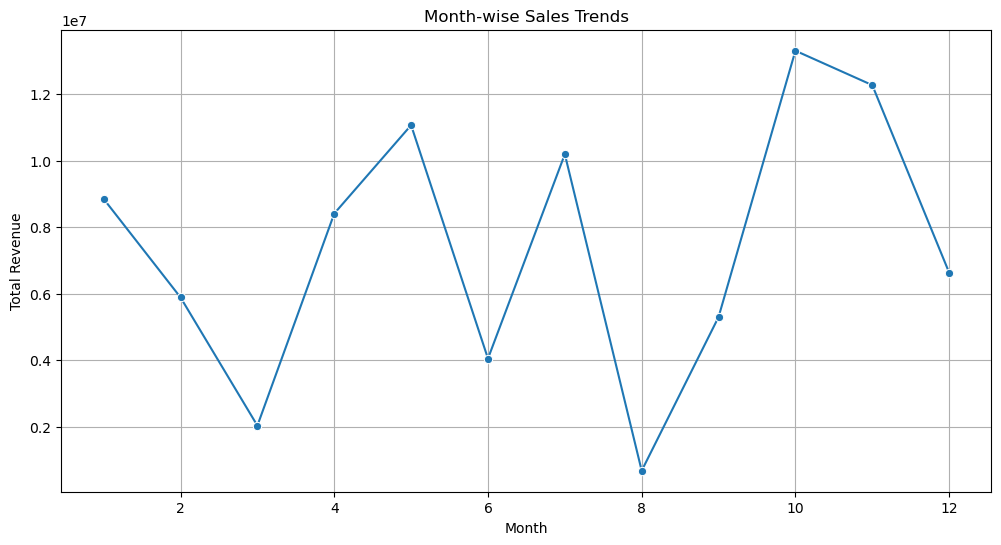

In [85]:
# Ploting month-wise sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Month', y='Total Revenue', data=month_wise_sales, marker='o')
plt.title('Month-wise Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

Month-Wise Sales Trends in Bar Plot

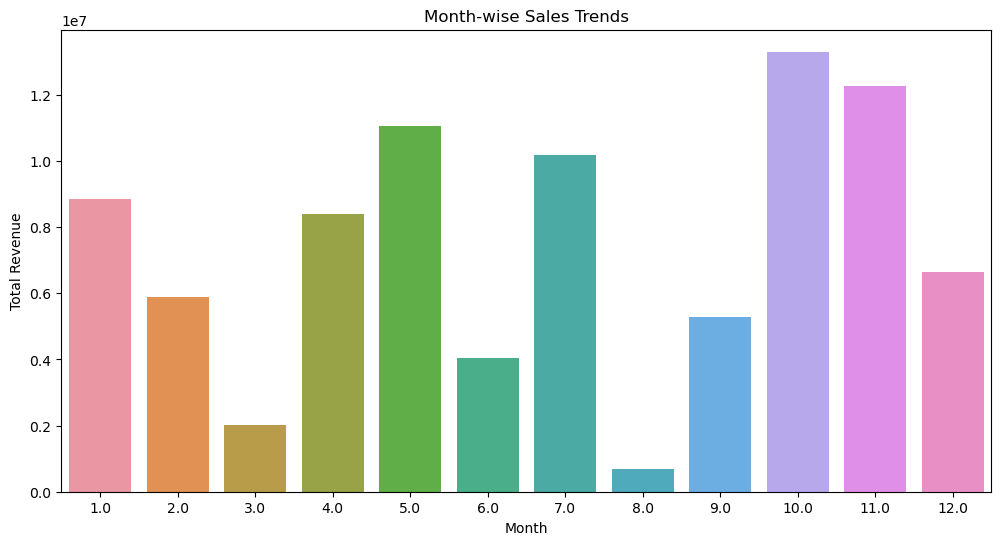

In [86]:
# Ploting month-wise sales trends
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Month', y='Total Revenue', data=month_wise_sales)
plt.title('Month-wise Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

Year-Wise Sales Trends in Line Plot

c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


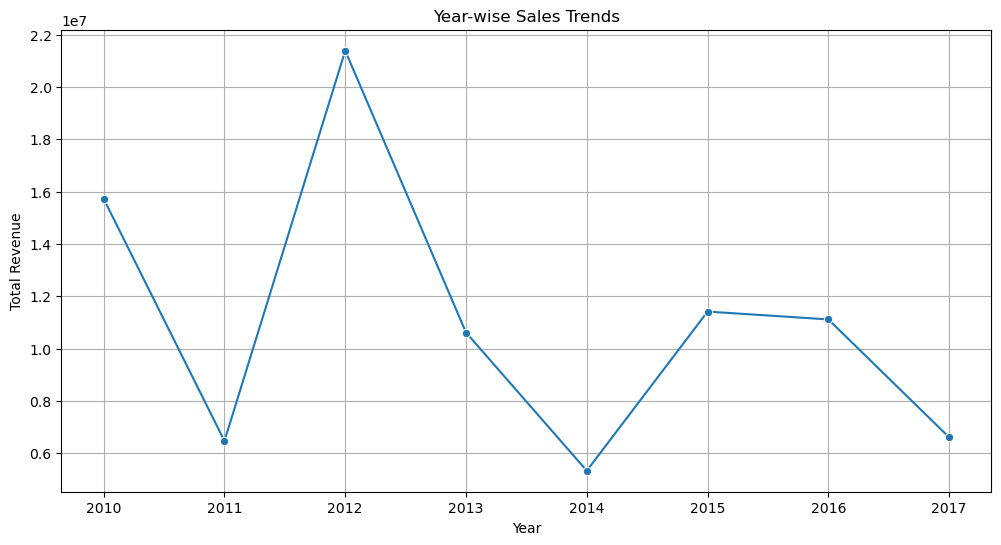

In [87]:
# Ploting year-wise sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Year', y='Total Revenue', data=year_wise_sales, marker='o')
plt.title('Year-wise Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

Year-Wise Sales Trends in Bar Plot

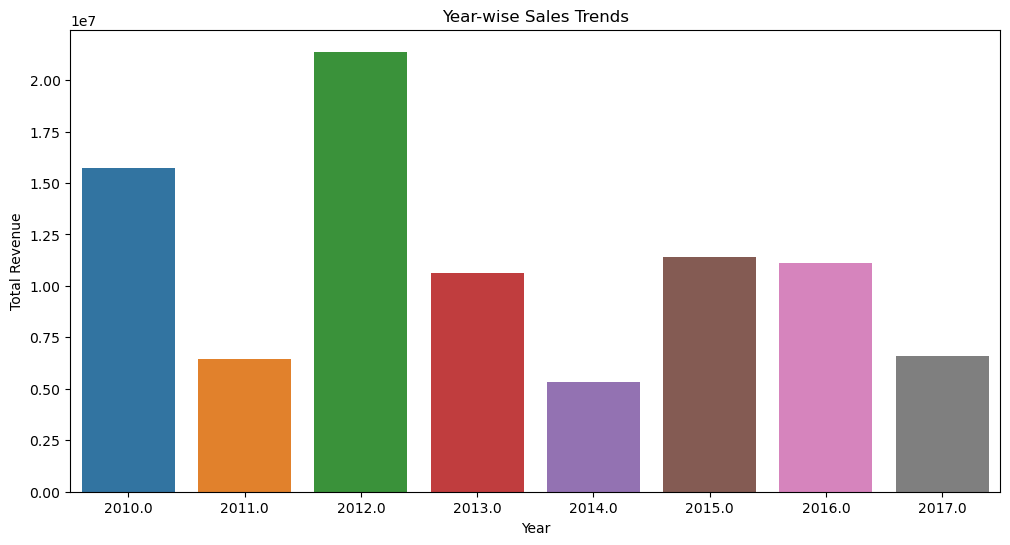

In [88]:
# Ploting year-wise sales trends
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Year', y='Total Revenue', data=year_wise_sales)
plt.title('Year-wise Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

Yearly-Month-Wise Sales Trends in Heat Map

c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


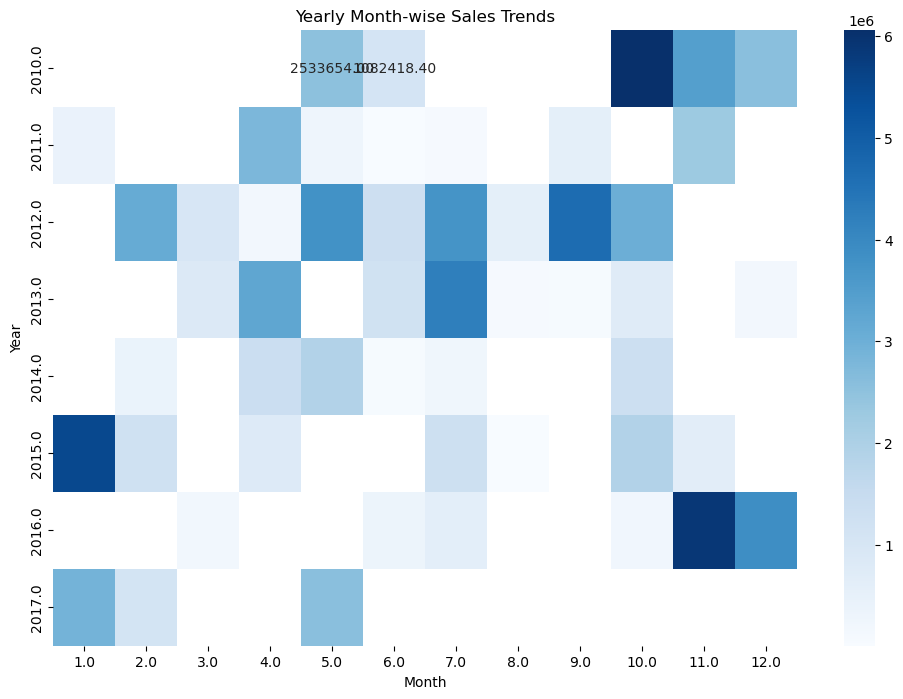

In [89]:
# Ploting yearly month-wise sales trends
plt.figure(figsize=(12, 8))
sns.heatmap(yearly_month_wise_sales, annot=True, fmt='.2f', cmap='Blues')
plt.title('Yearly Month-wise Sales Trends')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

Descriptive Statistics

Summary statistics for the numerical columns to get an overview of the data distribution (mean, median, standard deviation, etc.).

In [90]:
# key metrics
key_metrics = df.describe()
key_metrics

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
count,66,1.000000e+02,64,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,66.000000,66.000000
mean,2013-10-11 01:49:05.454545408,5.550204e+08,2013-10-31 15:22:30,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,6.742424,2013.242424
min,2010-05-28 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,1.000000,2010.000000
25%,2012-02-24 12:00:00,3.389225e+08,2012-02-06 00:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,4.000000,2012.000000
50%,2013-08-03 12:00:00,5.577086e+08,2013-11-04 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,7.000000,2013.000000
75%,2015-07-26 00:00:00,7.907551e+08,2015-09-03 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,10.000000,2015.000000
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,12.000000,2017.000000
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,3.273721,2.119946


Coorelation Between all the Numeric-Attributes

In [91]:
# correlations between attributes
numeric_df = df.select_dtypes(include='number')

correlations = numeric_df.corr()
correlations

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
Order ID,1.000000,-0.222907,-0.190941,-0.213201,-0.314688,-0.328944,-0.234638,-0.243660,0.086220
Units Sold,-0.222907,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550,-0.033884,0.029312
Unit Price,-0.190941,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365,0.027641,-0.097061
Unit Cost,-0.213201,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214,0.008989,-0.122488
Total Revenue,-0.314688,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327,0.049782,-0.081305
Total Cost,-0.328944,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091,0.021175,-0.109441
Total Profit,-0.234638,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000,0.108816,-0.001467
Order Month,-0.243660,-0.033884,0.027641,0.008989,0.049782,0.021175,0.108816,1.000000,-0.201457
Order Year,0.086220,0.029312,-0.097061,-0.122488,-0.081305,-0.109441,-0.001467,-0.201457,1.000000


Bar Plots of all the Strong Correlations 

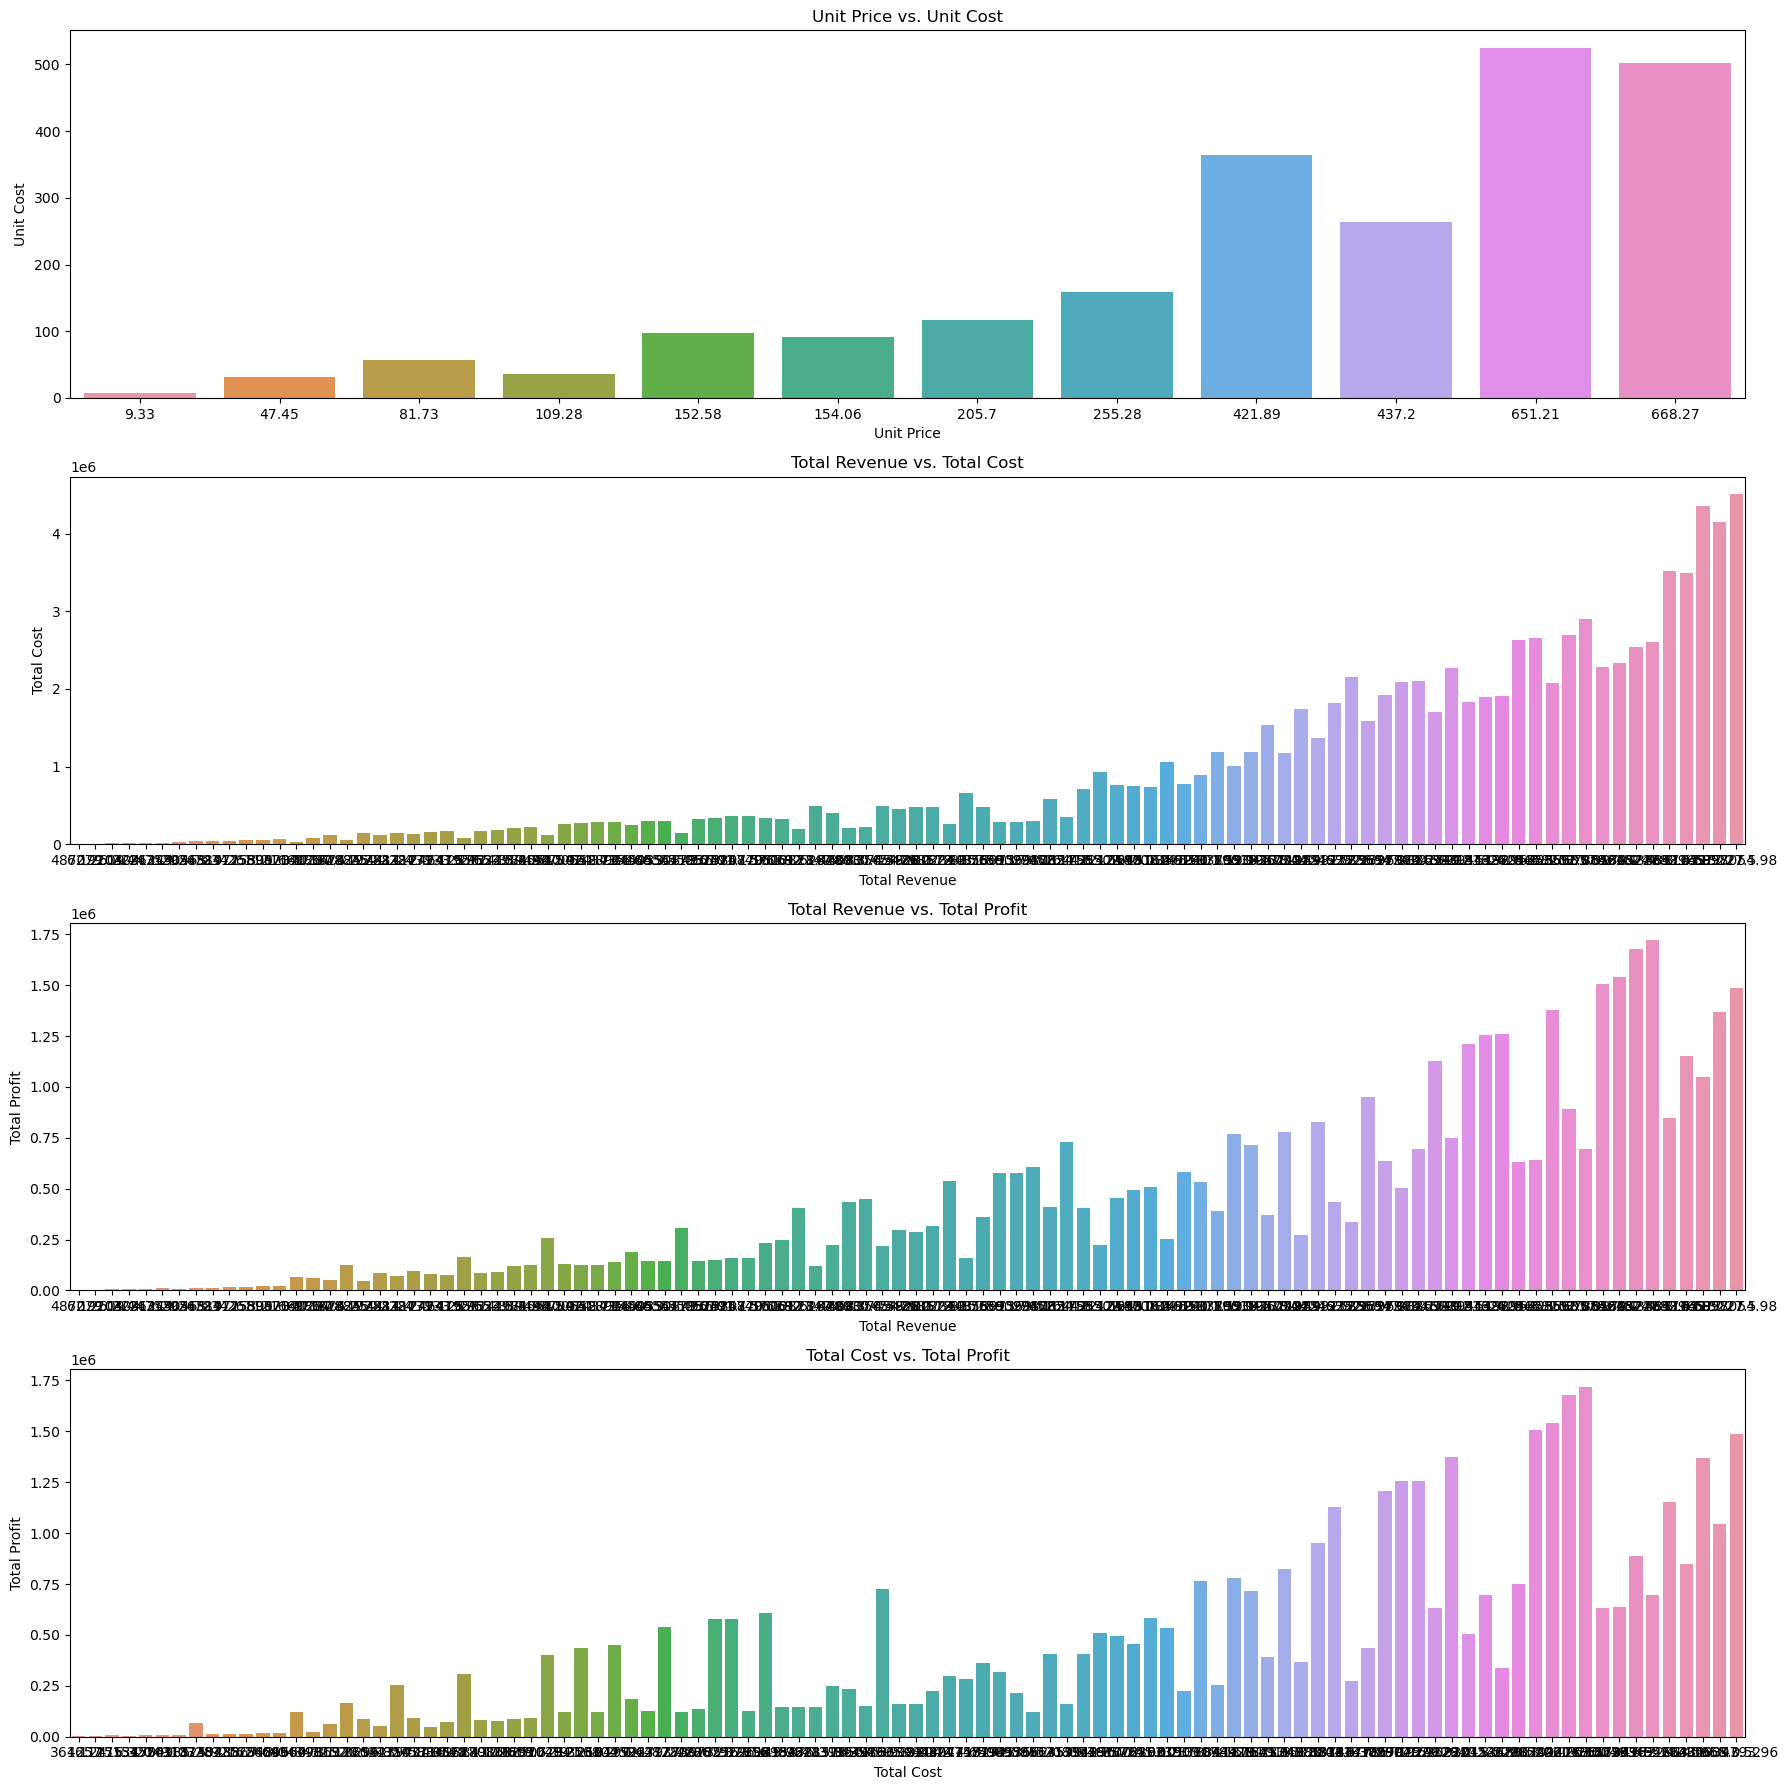

In [92]:
# Creating bar plots of strong correlations
plt.figure(figsize=(18, 18))

# Unit Price vs. Unit Cost
plt.subplot(4, 1, 1)
sns.barplot(data=df, x='Unit Price', y='Unit Cost')
plt.title('Unit Price vs. Unit Cost')
plt.xlabel('Unit Price')
plt.ylabel('Unit Cost')

# Total Revenue vs. Total Cost
plt.subplot(4, 1, 2)
sns.barplot(data=df, x='Total Revenue', y='Total Cost')
plt.title('Total Revenue vs. Total Cost')
plt.xlabel('Total Revenue')
plt.ylabel('Total Cost')

# Total Revenue vs. Total Profit
plt.subplot(4, 1, 3)
sns.barplot(data=df, x='Total Revenue', y='Total Profit')
plt.title('Total Revenue vs. Total Profit')
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')


# # Total Cost vs. Total Profit
plt.subplot(4, 1, 4)
sns.barplot(data=df, x='Total Cost', y='Total Profit')
plt.title('Total Cost vs. Total Profit')
plt.xlabel('Total Cost')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

Scatter Plots of all the Strong Correlations 

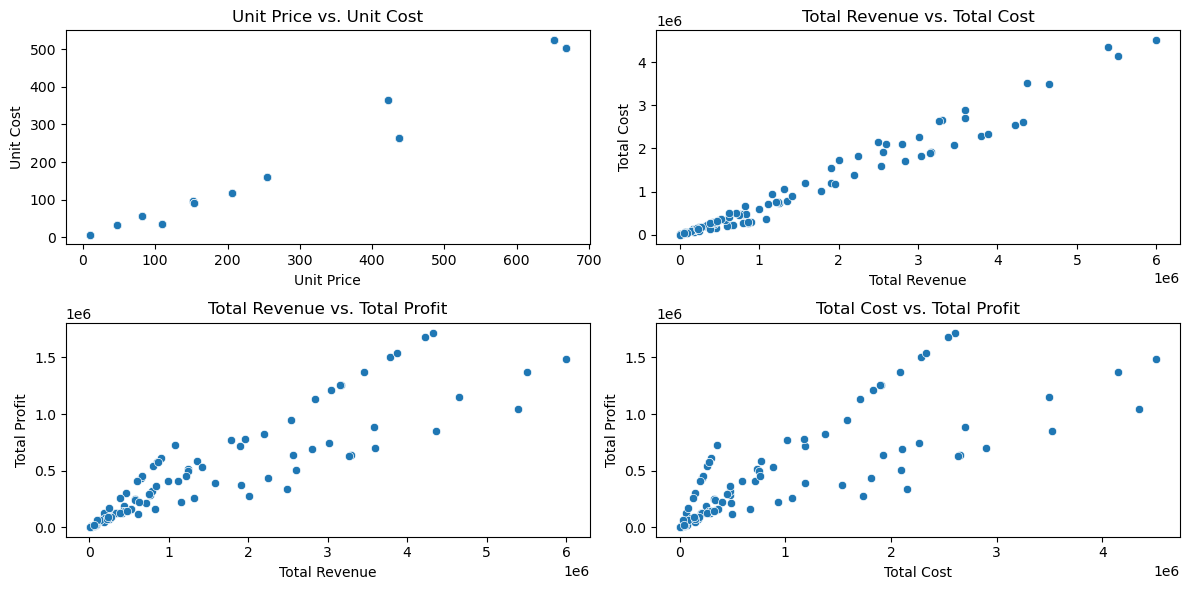

In [93]:
# Pairs with strong correlations
strong_pairs = [
    ("Unit Price", "Unit Cost"),
    ("Total Revenue", "Total Cost"),
    ("Total Revenue", "Total Profit"),
    ("Total Cost", "Total Profit")
]

# Scatter plots for the strong correlations
plt.figure(figsize=(12, 6))

for i, (x, y) in enumerate(strong_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{x} vs. {y}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()

Hist Plot Distributions of all the Strong Correlation

c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

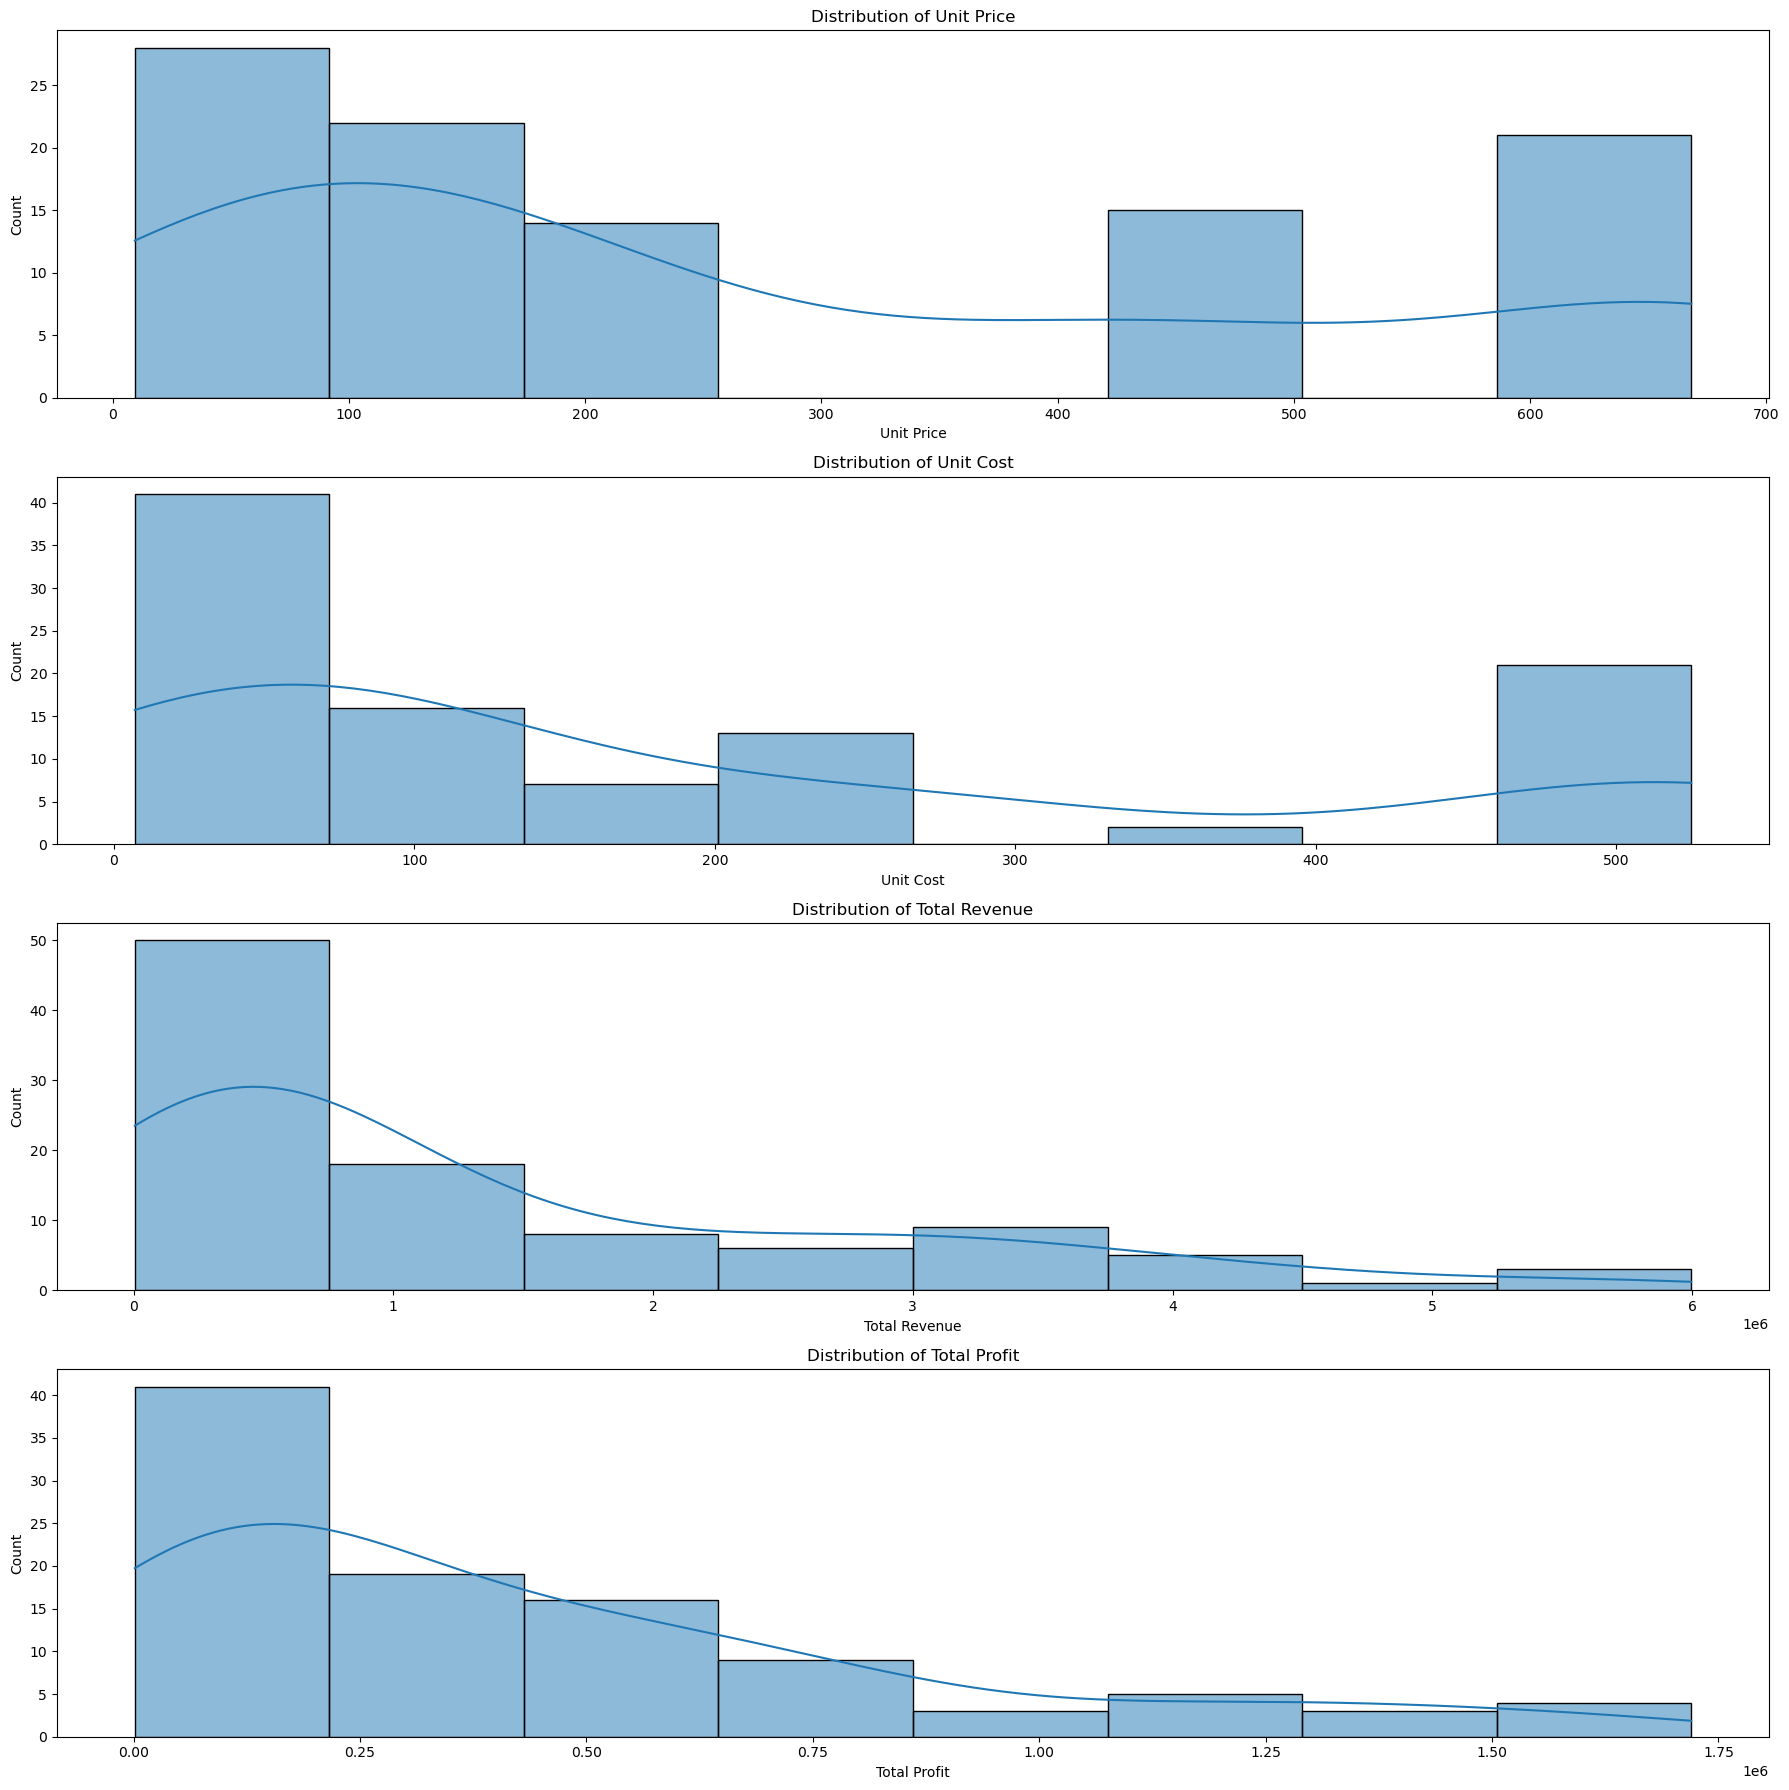

In [94]:
# Plot distributions of all the Strong Correlation
plt.figure(figsize=(18, 18))

plt.subplot(4, 1, 1)
sns.histplot(df['Unit Price'], kde=True)
plt.title('Distribution of Unit Price')

plt.subplot(4, 1, 2)
sns.histplot(df['Unit Cost'], kde=True)
plt.title('Distribution of Unit Cost')

plt.subplot(4, 1, 3)
sns.histplot(df['Total Revenue'], kde=True)
plt.title('Distribution of Total Revenue')

plt.subplot(4, 1, 4)
sns.histplot(df['Total Profit'], kde=True)
plt.title('Distribution of Total Profit')

plt.tight_layout()
plt.show()

Box Plots of all the Strong Correlations 

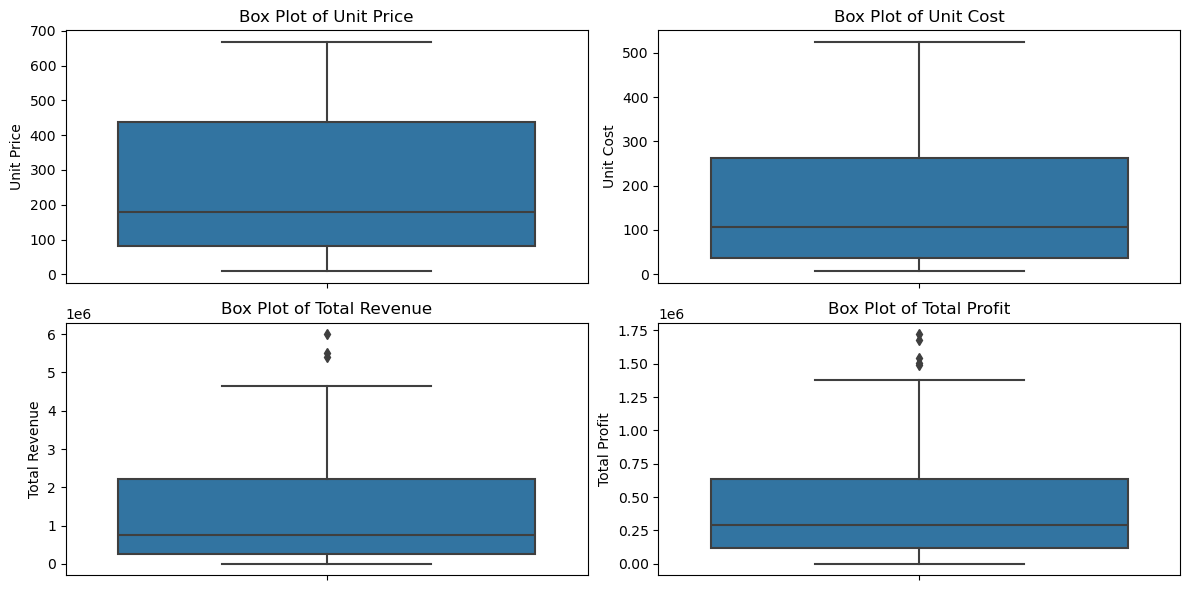

In [95]:
# Box Plots to Detect Outliers
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['Unit Price'])
plt.title('Box Plot of Unit Price')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['Unit Cost'])
plt.title('Box Plot of Unit Cost')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['Total Revenue'])
plt.title('Box Plot of Total Revenue')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['Total Profit'])
plt.title('Box Plot of Total Profit')

plt.tight_layout()
plt.show()


Heat Map of Correlation Matrix

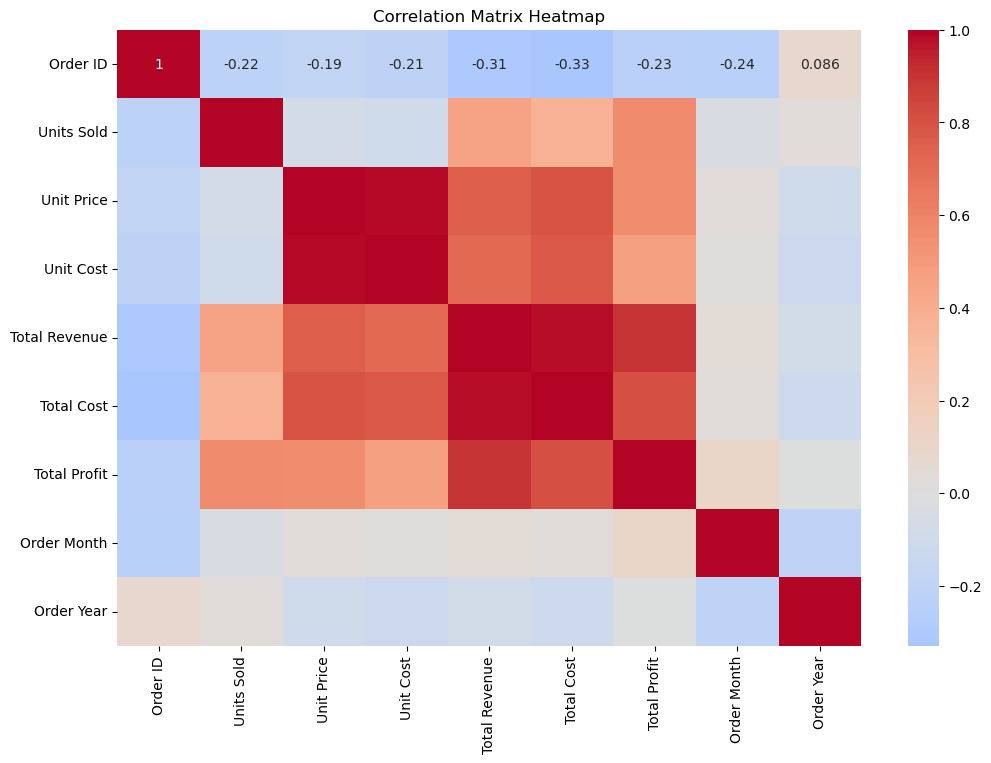

In [96]:
# correlation matrix
correlation_matrix = numeric_df.corr()

# Ploting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Pair Plot of all the Numerical Variables

c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

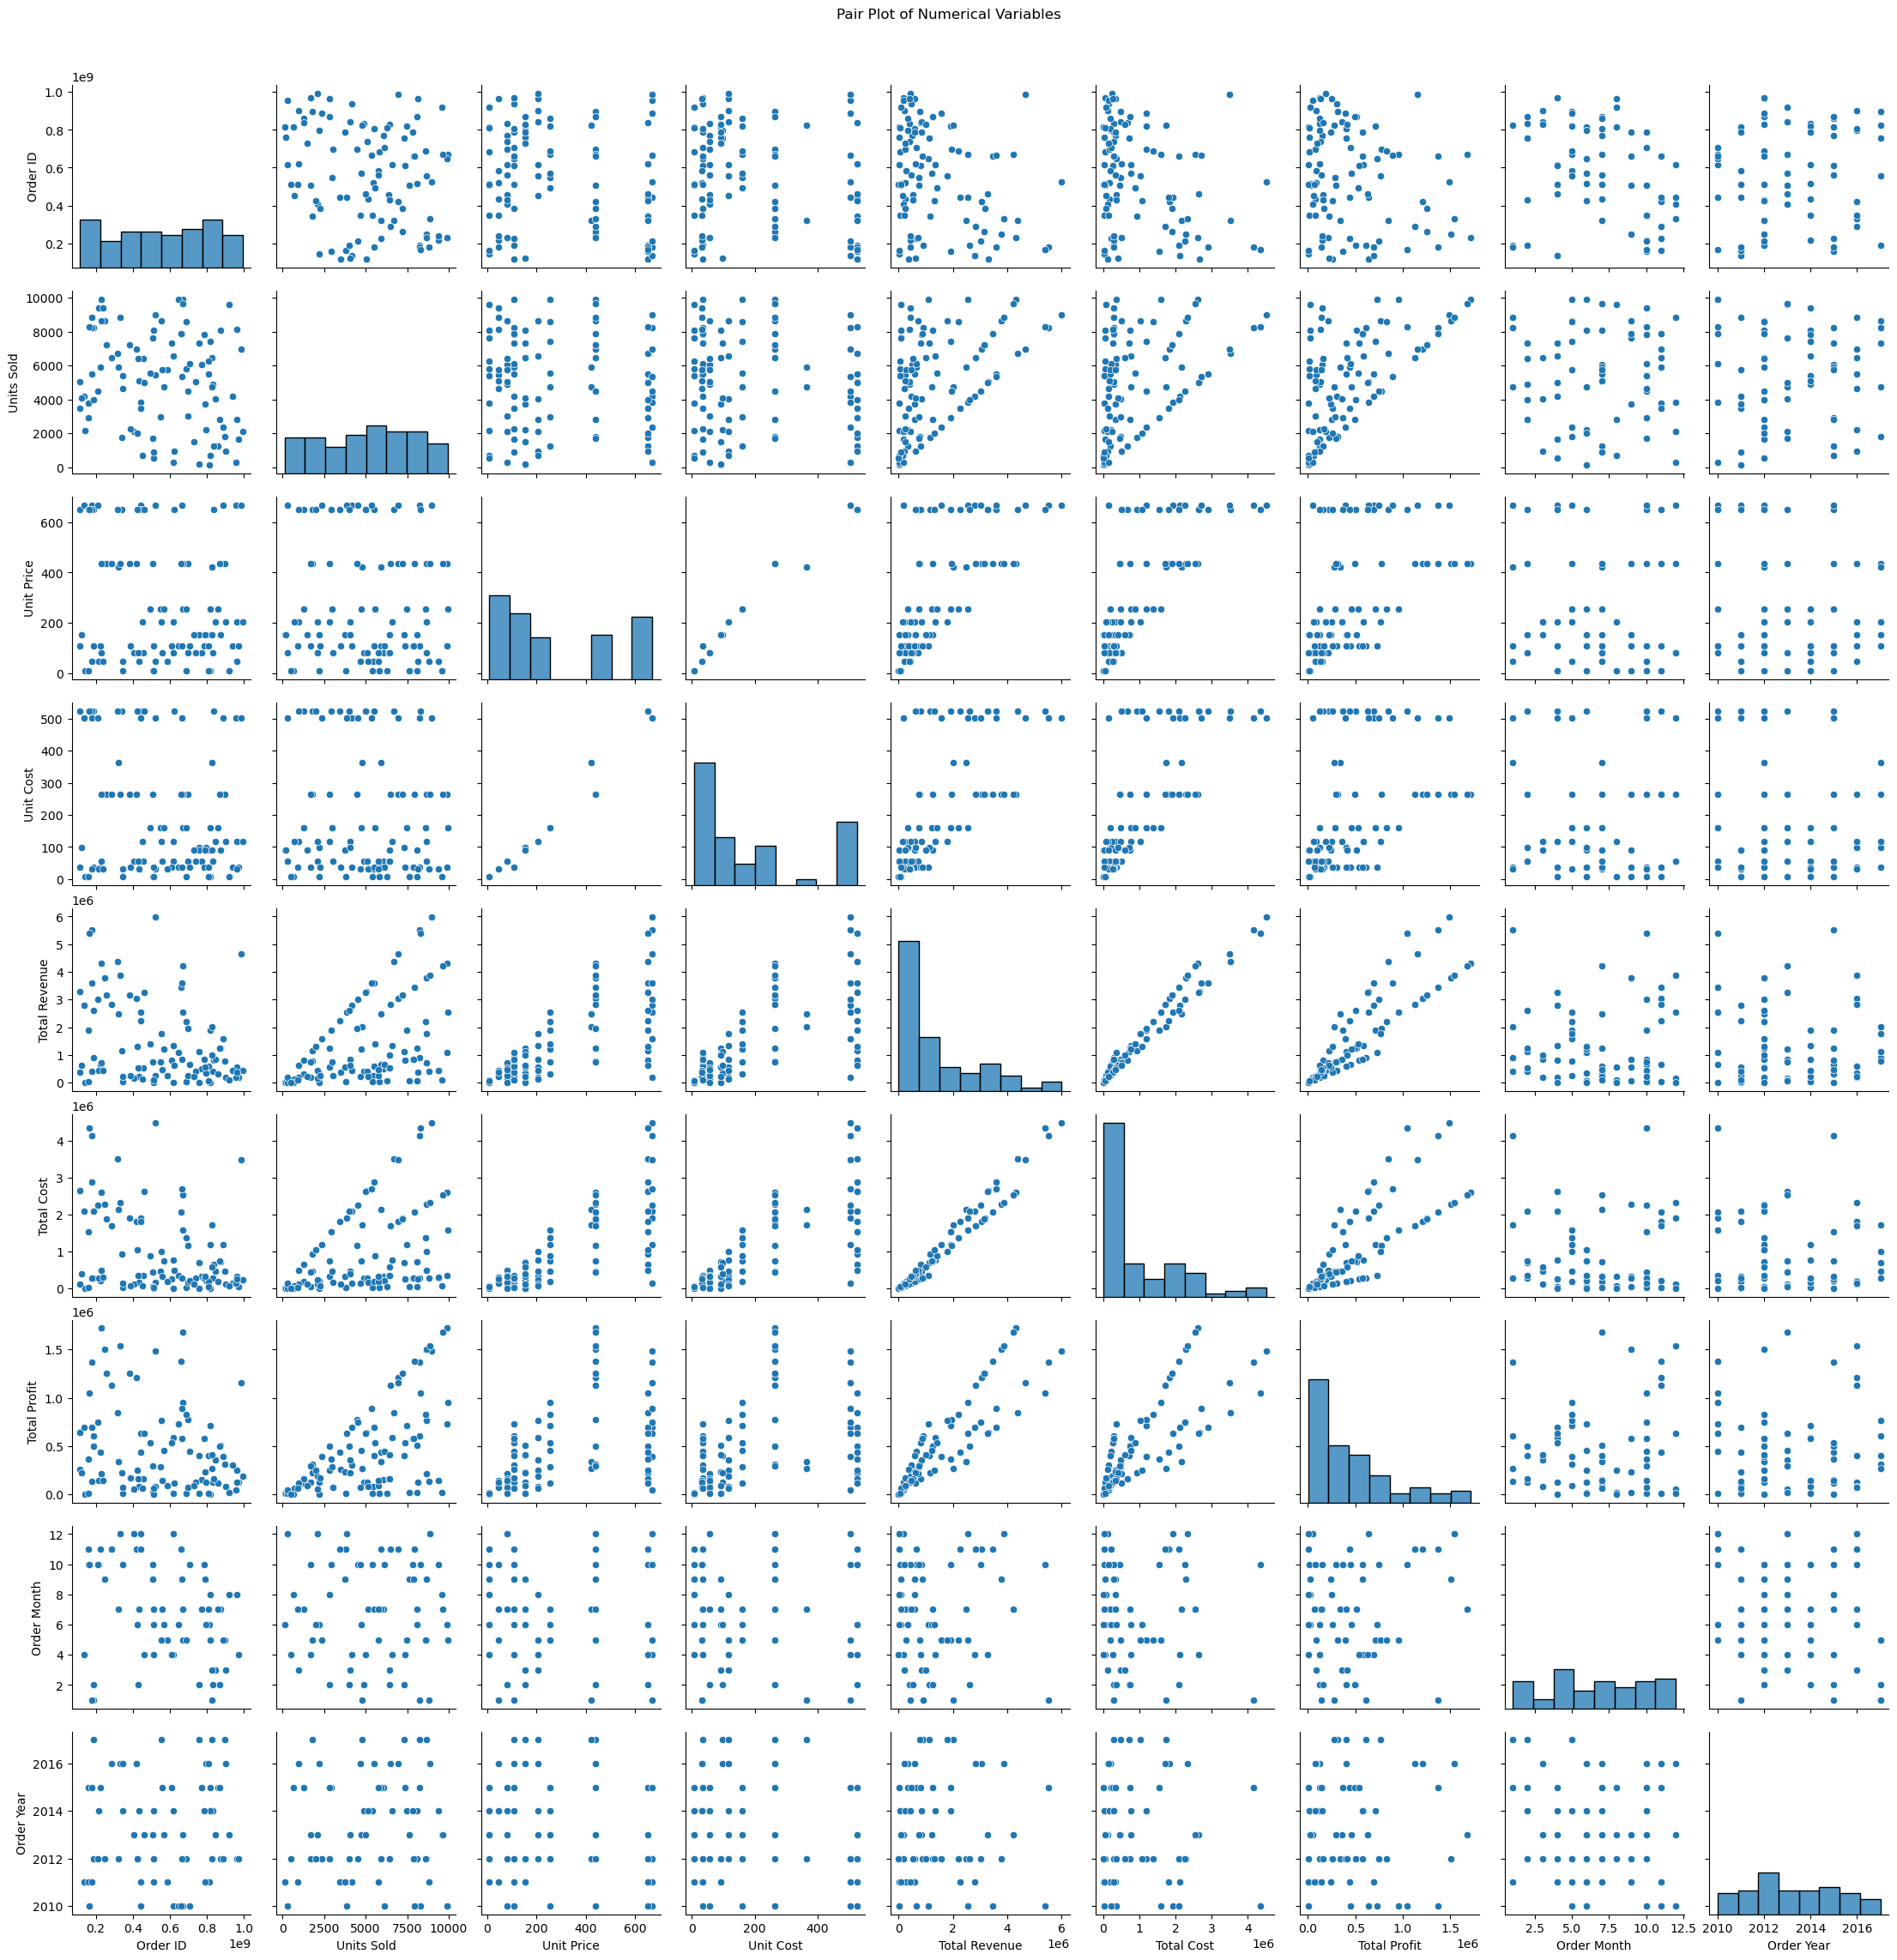

In [97]:
# Pair Plot for all numerical variables
sns.pairplot(df.select_dtypes(include='number'))
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

Sales Trend Over Time

c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fa065\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


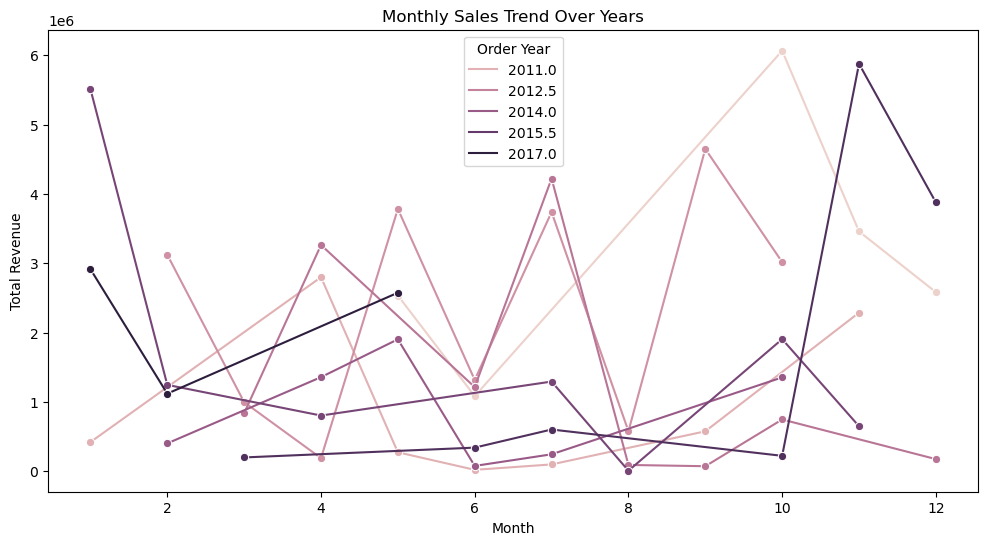

In [98]:
# Ploting sales trend over time
df_grouped = df.groupby(['Order Year', 'Order Month']).agg({'Total Revenue': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Order Month', y='Total Revenue', hue='Order Year', marker='o')
plt.title('Monthly Sales Trend Over Years')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

Average Profit by Region

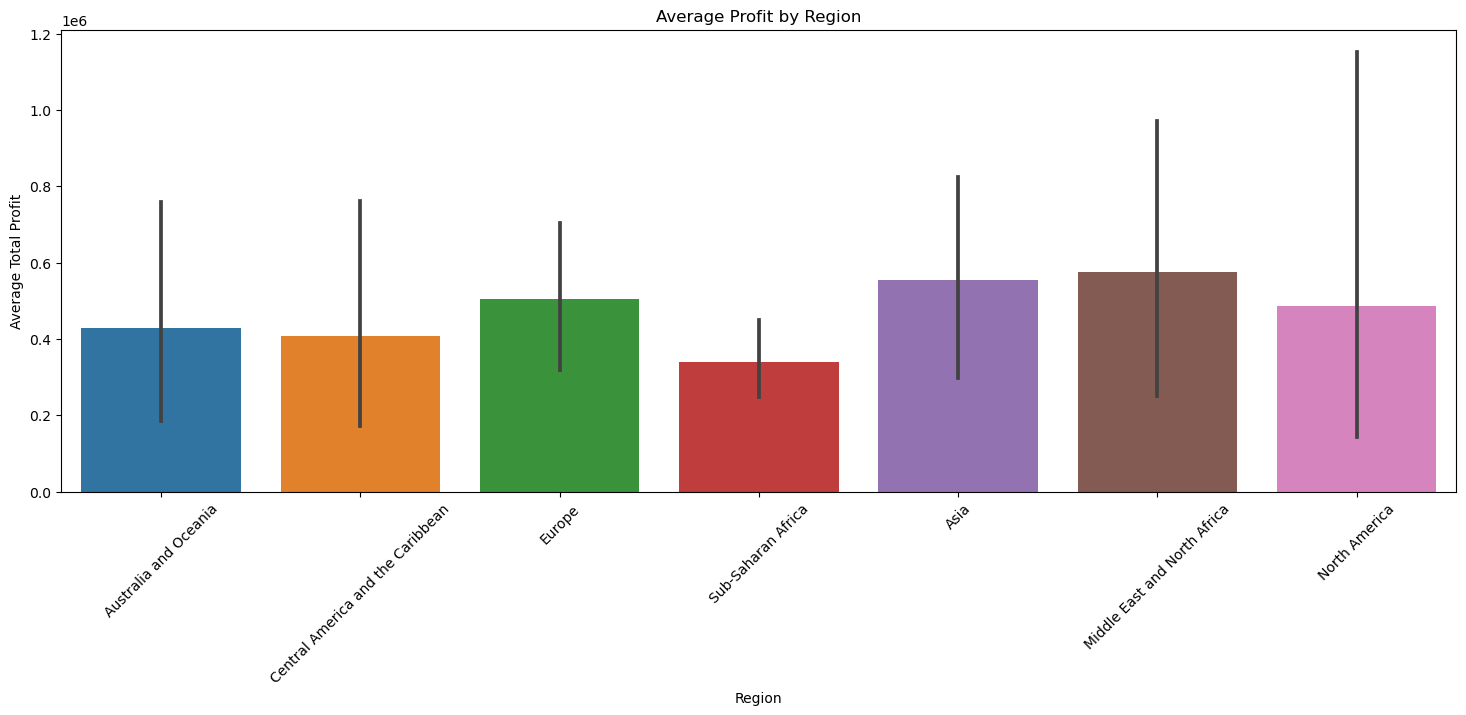

In [99]:
# Ploting average profit by region
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x='Region', y='Total Profit')
plt.title('Average Profit by Region')
plt.xlabel('Region')
plt.ylabel('Average Total Profit')
plt.xticks(rotation=45)
plt.show()

Average Revenue and Profit by Item Type

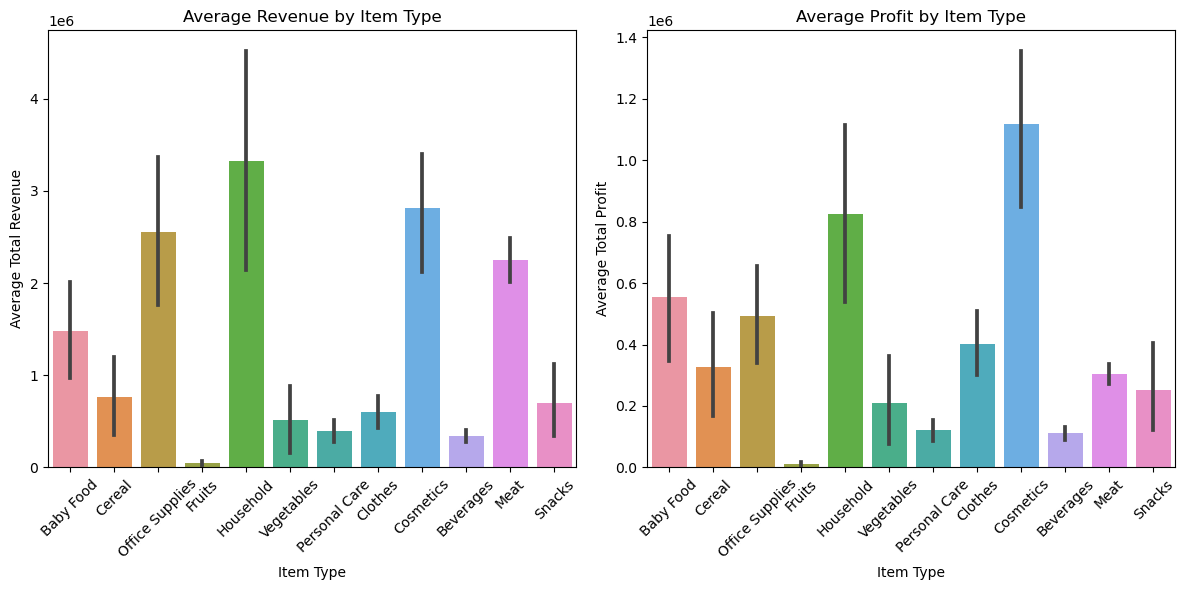

In [100]:
# Ploting average revenue and profit by item type
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Item Type', y='Total Revenue')
plt.title('Average Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Total Revenue')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Item Type', y='Total Profit')
plt.title('Average Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Total Profit')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Impact of Sales Channel on Revenue and Profit

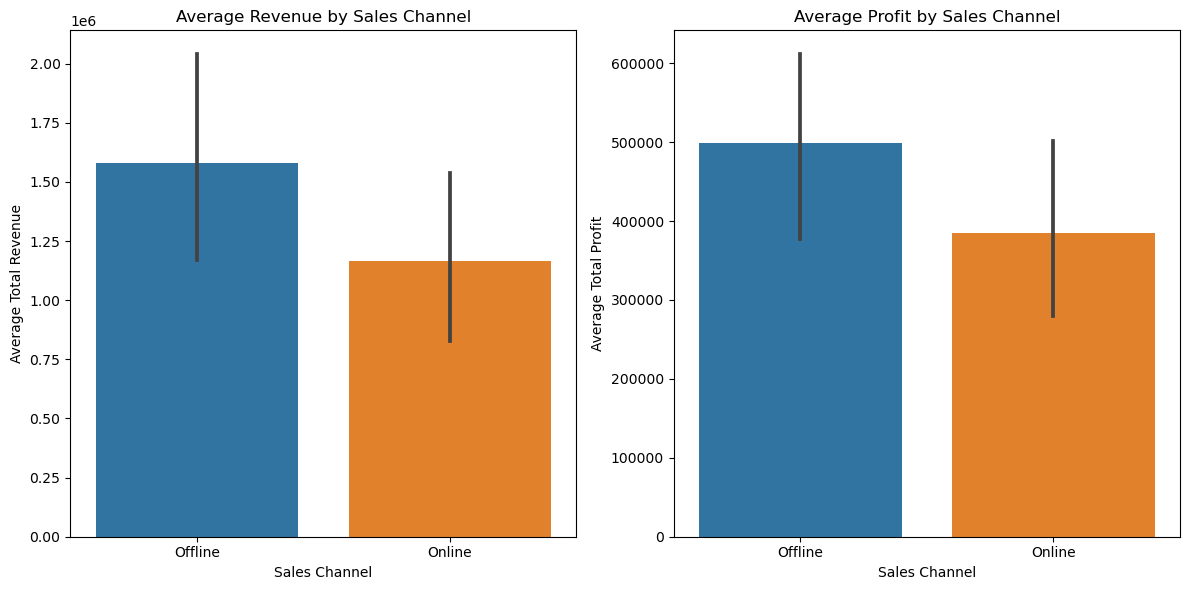

In [101]:
# Ploting impact of sales on revenue and profit
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Sales Channel', y='Total Revenue')
plt.title('Average Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Average Total Revenue')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Sales Channel', y='Total Profit')
plt.title('Average Profit by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Average Total Profit')

plt.tight_layout()
plt.show()

Impact of Order Priority on Total Profit

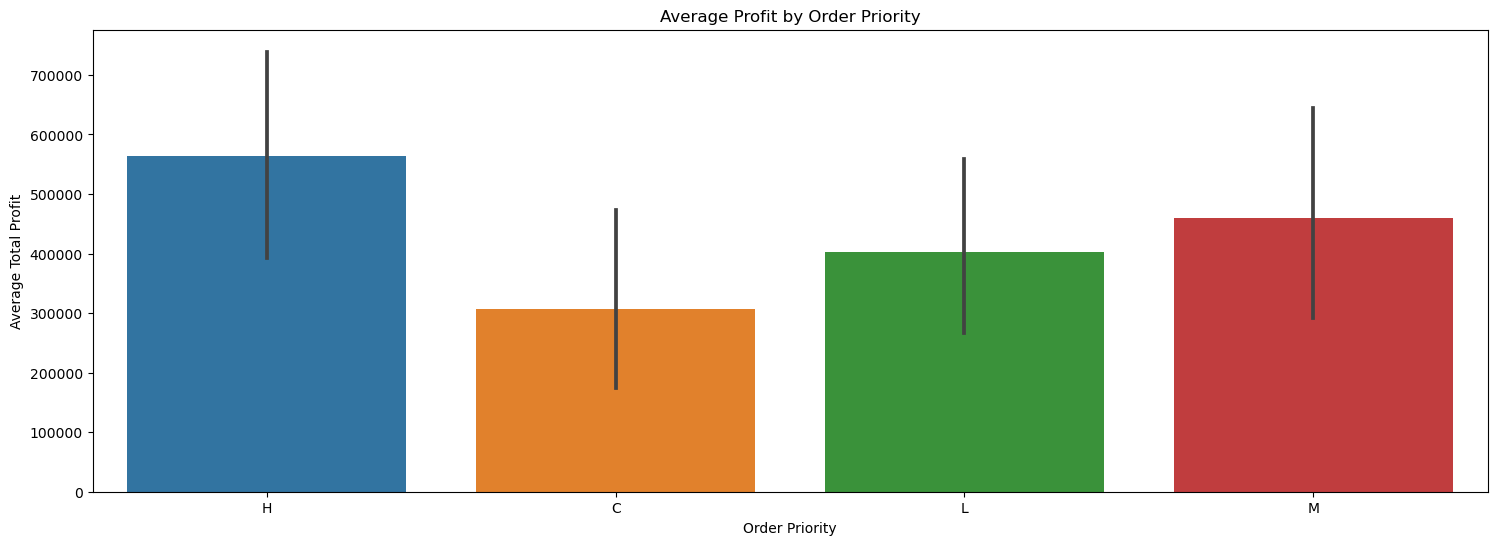

In [102]:
# Ploting impact of order priority on total profit
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x='Order Priority', y='Total Profit')
plt.title('Average Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Total Profit')
plt.show()


Top Countries by Total Revenue and Total Profit

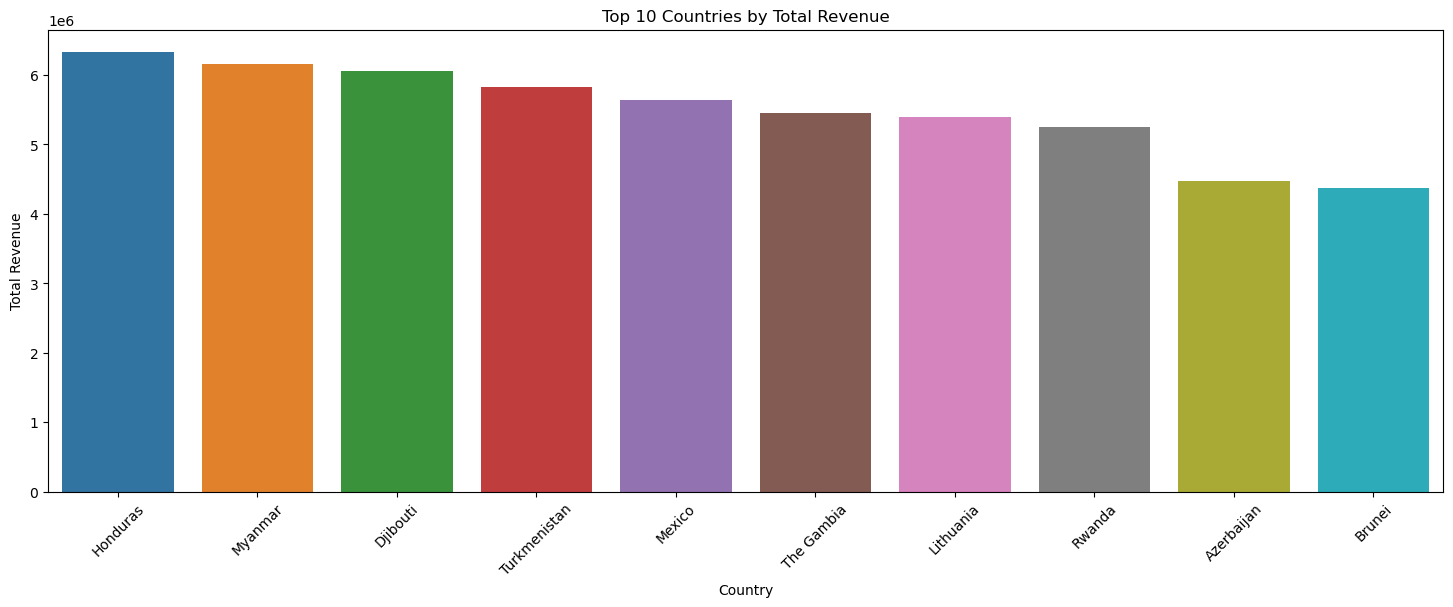

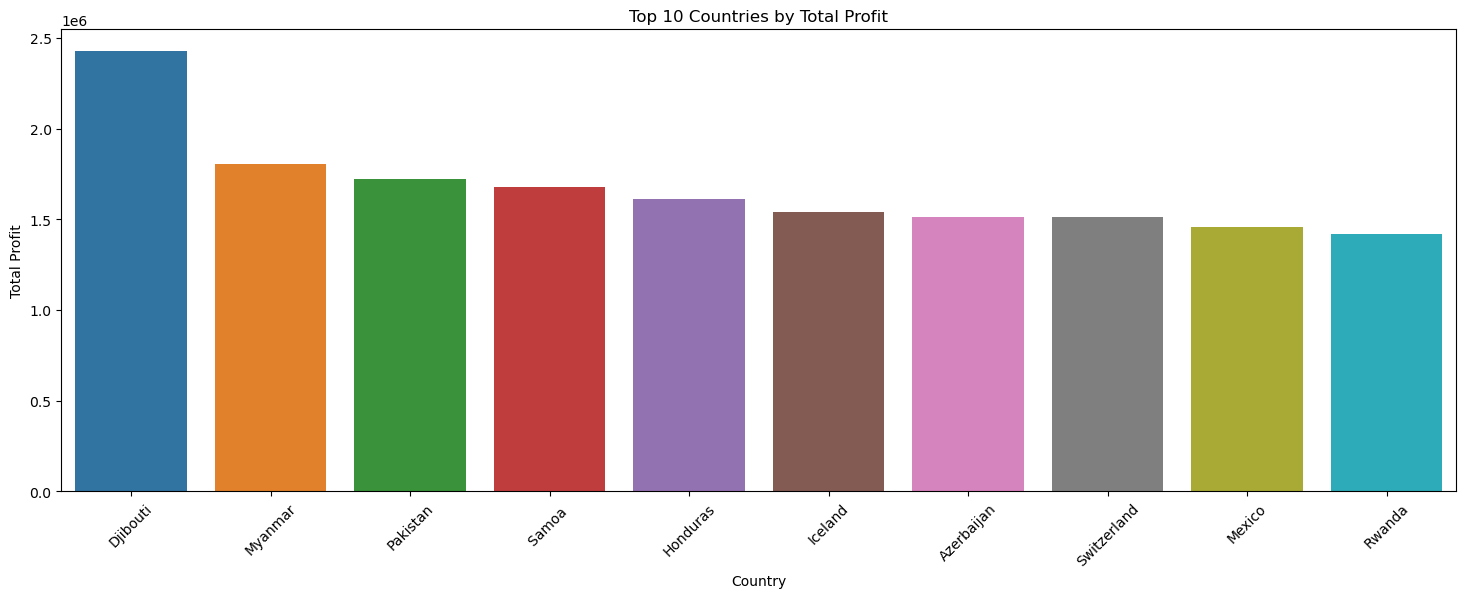

In [103]:
# Top countries by total revenue
top_revenue_countries = df.groupby('Country').agg({'Total Revenue': 'sum'}).sort_values(by='Total Revenue', ascending=False).head(10)
plt.figure(figsize=(18, 6))
sns.barplot(x=top_revenue_countries.index, y=top_revenue_countries['Total Revenue'])
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Top countries by total profit
top_profit_countries = df.groupby('Country').agg({'Total Profit': 'sum'}).sort_values(by='Total Profit', ascending=False).head(10)
plt.figure(figsize=(18, 6))
sns.barplot(x=top_profit_countries.index, y=top_profit_countries['Total Profit'])
plt.title('Top 10 Countries by Total Profit')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

Regression Analysis: Unit Price vs Total Revenue

In [104]:
import statsmodels.api as sm

# Regression analysis to see the effect of Unit Price on Total Revenue
X = df['Unit Price']
y = df['Total Revenue']

# Adding a constant to the model (required for statsmodels)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Total Revenue   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     127.8
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.82e-19
Time:                        16:52:13   Log-Likelihood:                -1519.0
No. Observations:                 100   AIC:                             3042.
Df Residuals:                      98   BIC:                             3047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.307e+04    1.5e+05      0.555      0.5